In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/


In [ ]:
#Reading two data sets and combining them into single data frame
df1_1 = pd.read_csv(r"fraudTrain.csv")
df1_1 = df1_1.drop(df1_1.columns[0], axis=1)

df1_2 = pd.read_csv(r"fraudTest.csv")
df1_2 = df1_2.drop(df1_2.columns[0], axis=1)

df = pd.concat([df1_1,df1_2])
df.reset_index(inplace=True)
df.head()

In [ ]:
#Min Max and Mean of all columns
df.describe()

,index,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.isna().sum()

index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [ ]:
#Column Values
count=[df[col].nunique() for col in df]
count=pd.DataFrame({'Unique':count})
count['col']=df.columns
count

,Unique,col
0,1296675,index
1,1819551,trans_date_trans_time
2,999,cc_num
3,693,merchant
4,14,category
5,60616,amt
6,355,first
7,486,last
8,2,gender
9,999,street


In [ ]:
import datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [ ]:
df['trans_hour']=df['trans_date_trans_time'] .dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['month'] = df['trans_date_trans_time'].dt.month
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))

In [ ]:
#Distance between Merchant and customer
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 +np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))
df['dist'] = haversine(df['lat'], df['long'],df['merch_lat'], df['merch_long'])

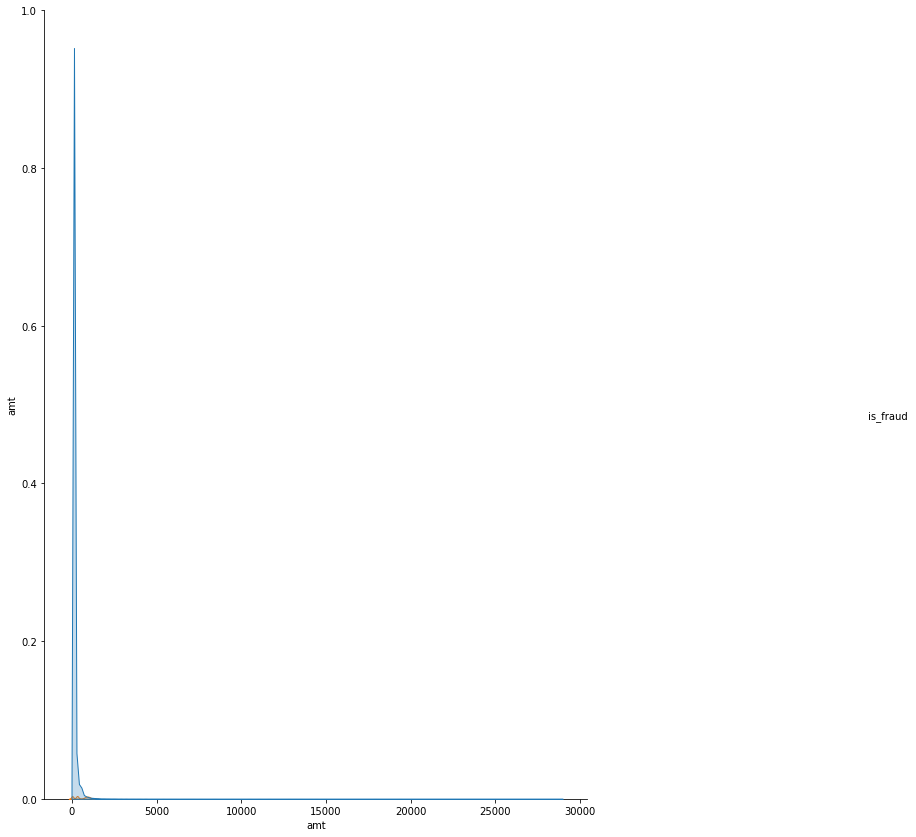

In [ ]:
var=['amt','is_fraud']
g=sns.pairplot(data=df[var],hue="is_fraud")
g.fig.set_size_inches(15,15)

In [ ]:
df[var]

,amt,is_fraud
0,4.97,0
1,107.23,0
2,220.11,0
3,45.00,0
4,41.96,0
...,...,...
1852389,43.77,0
1852390,111.84,0
1852391,86.88,0
1852392,7.99,0


In [ ]:
#Fraud Transactions
df.is_fraud.value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [ ]:
df_fraud=df.loc[df.is_fraud==1]

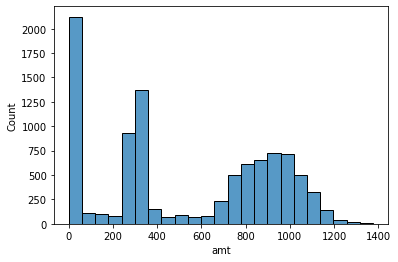

In [ ]:
sns.histplot(data=df_fraud,x='amt')

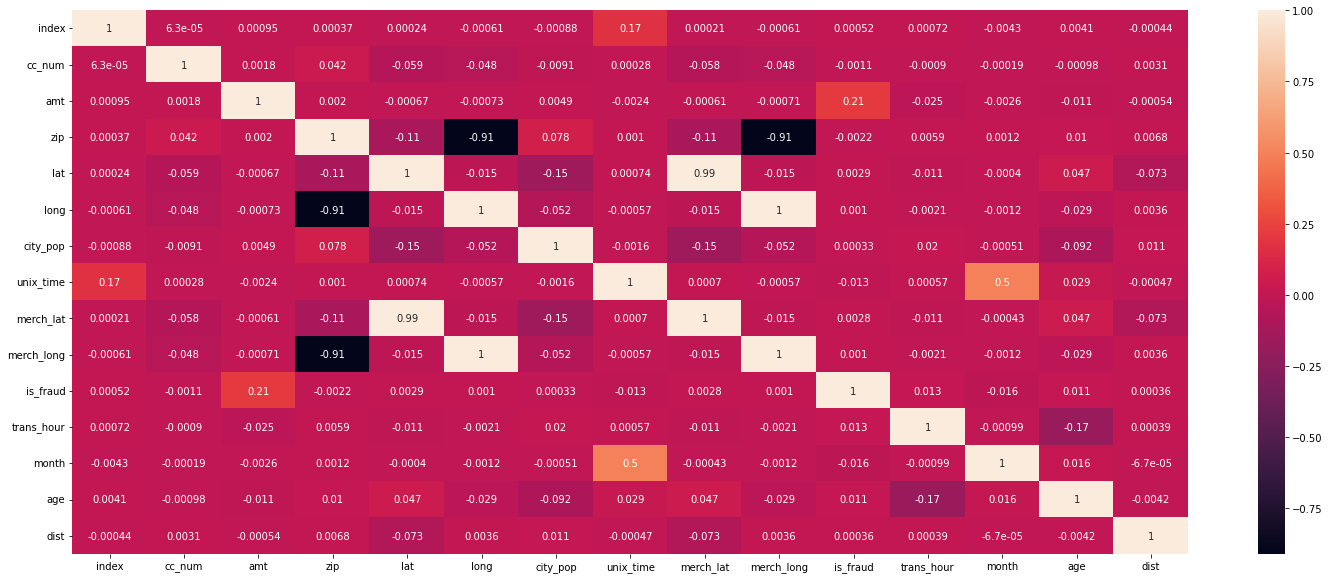

In [ ]:
c=df.corr()
f=plt.figure(figsize=(25,10))
ax=f.gca()
sns.heatmap(c,annot=True,ax=ax)

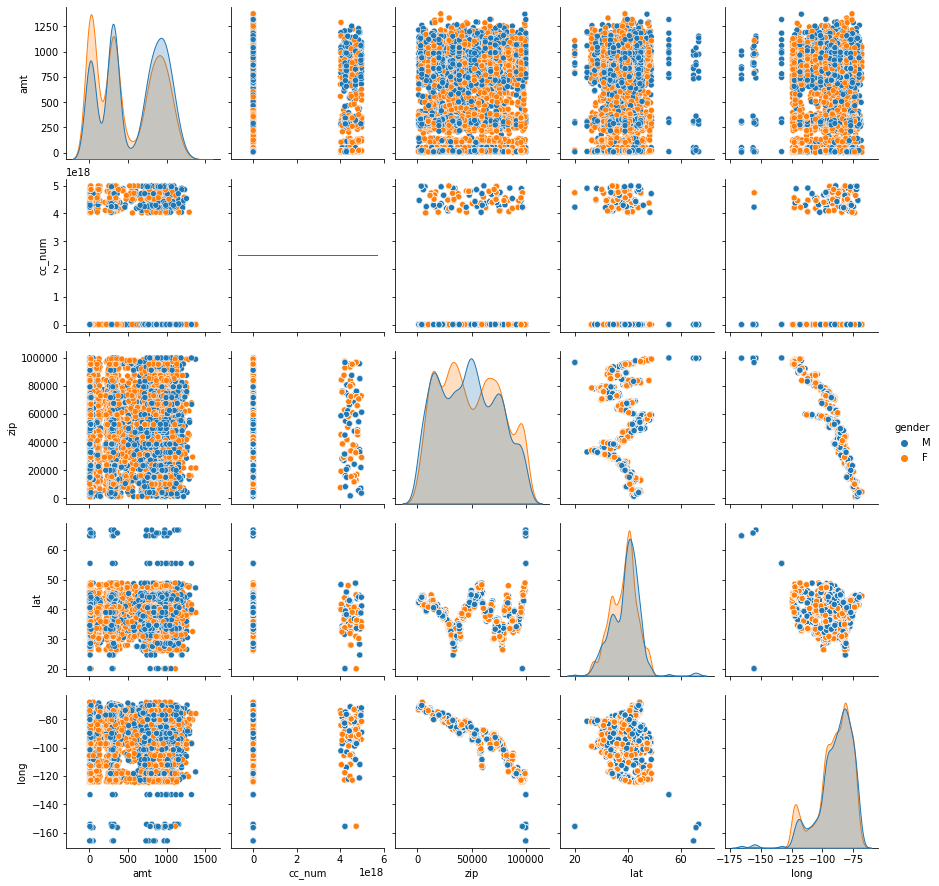

In [ ]:
var=['amt','cc_num','zip','lat','long','gender']
sns.pairplot(data=df_fraud[var],hue="gender")

In [ ]:
def feature_per(feature,a=20,b=10,c=2):   
    df1=df[[feature,'is_fraud']]
    df1['count']=1
    fraud_cat=df1.groupby(by=feature).sum()
    fraud_cat['per']=fraud_cat['is_fraud']/fraud_cat['count']*100
    fraud_cat=fraud_cat[fraud_cat['count']>1000]
    fraud_cat.sort_values(by='per',ascending=False,inplace=True)
    g=plt.figure(figsize=(a,b))
    ax=g.gca()
    sns.set(font_scale = c)
    sns.lineplot(data=fraud_cat.head(10),x=feature,y='per',ax=ax)

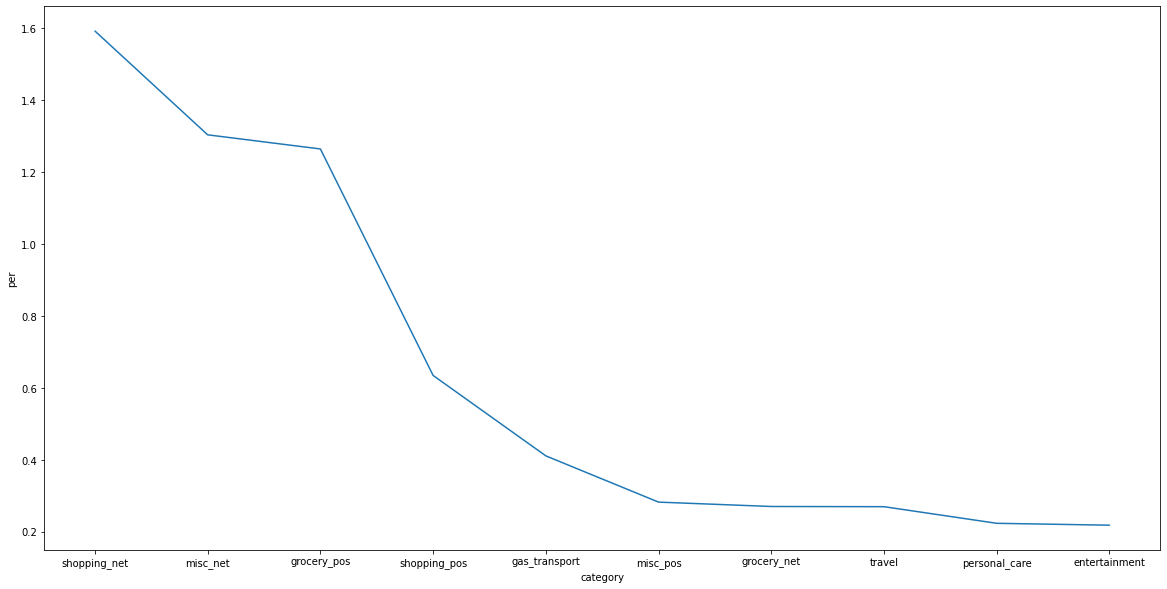

In [ ]:
feature_per('category')

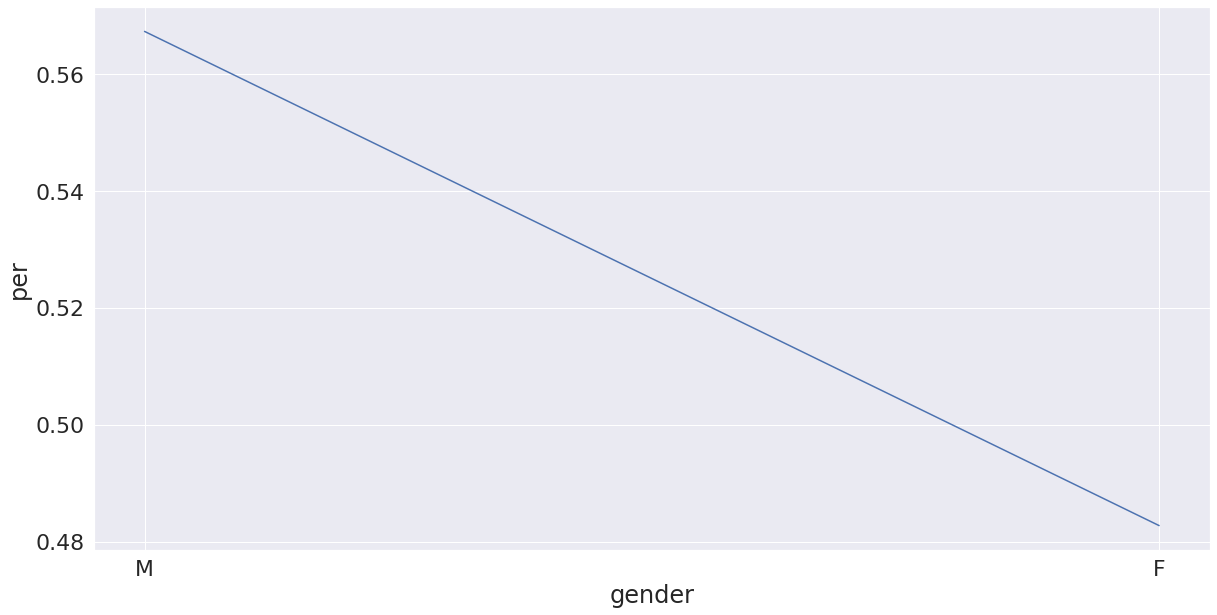

In [ ]:
feature_per('gender')

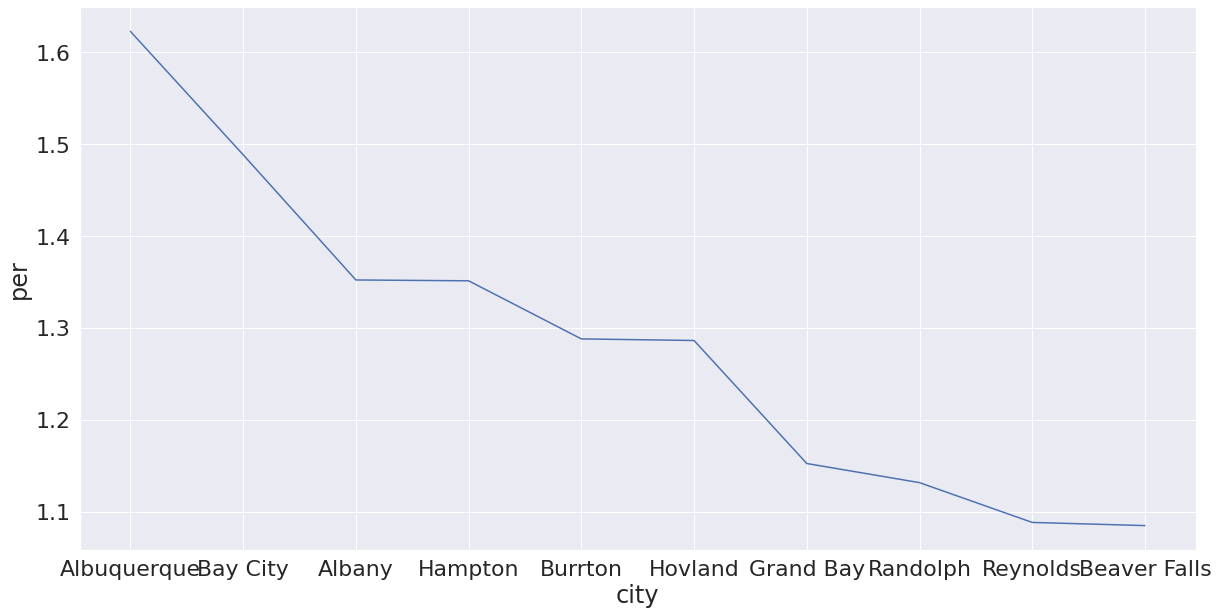

In [ ]:
feature_per('city')

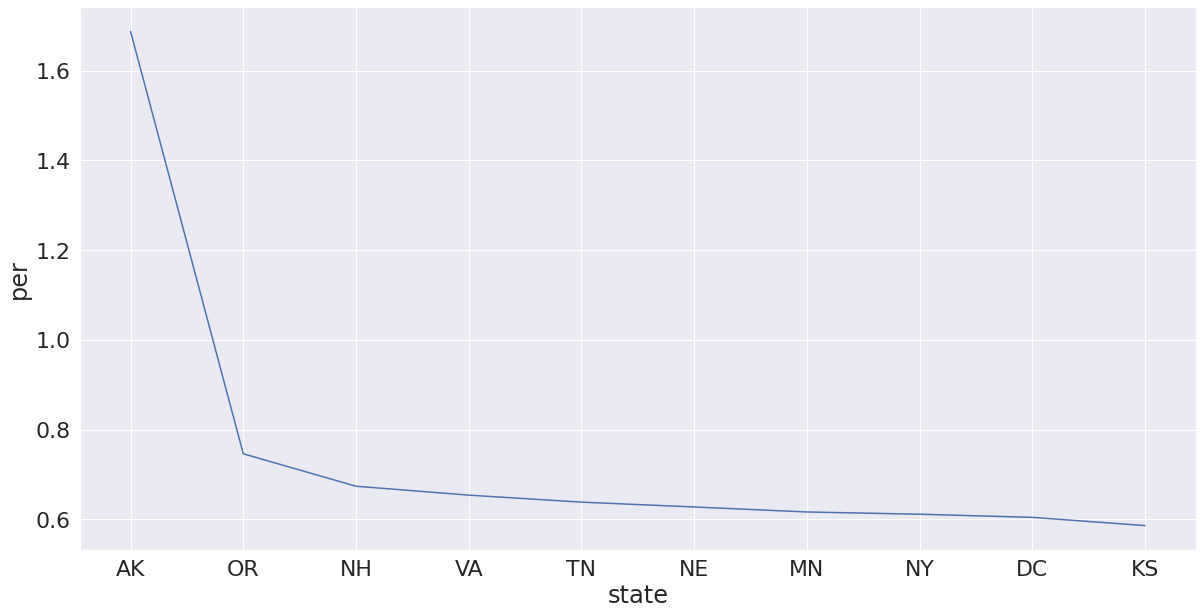

In [ ]:
feature_per('state')

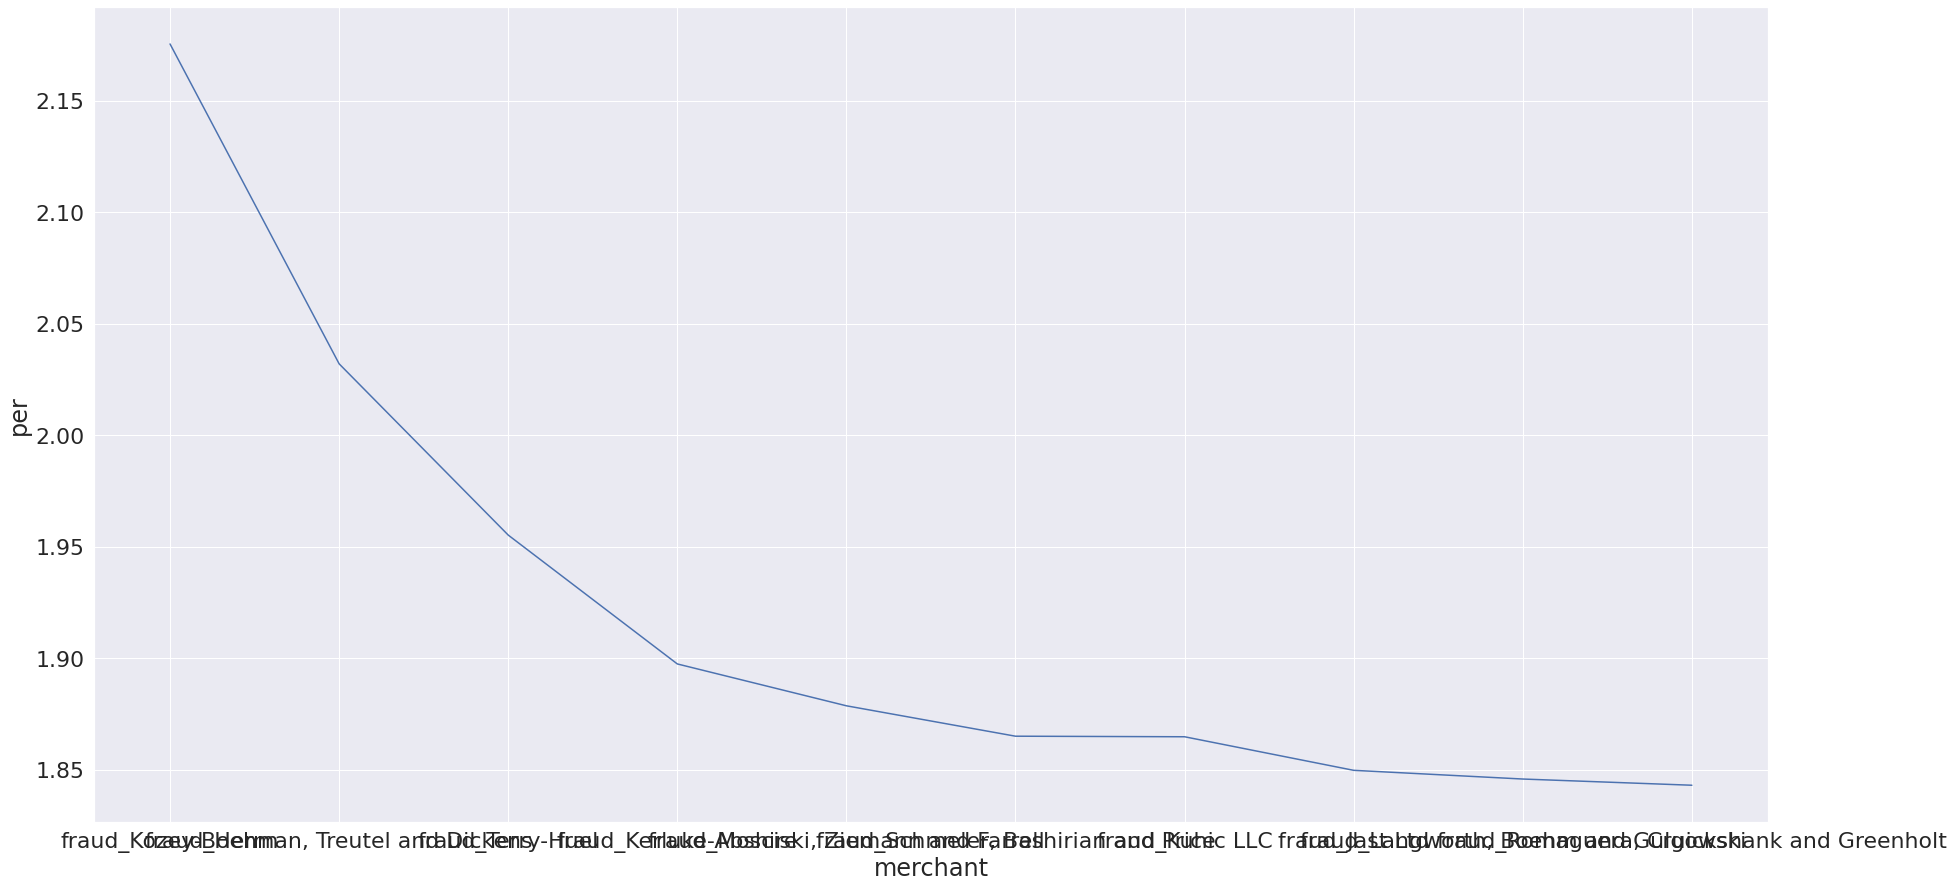

In [ ]:
feature_per('merchant',30,15,0.5)

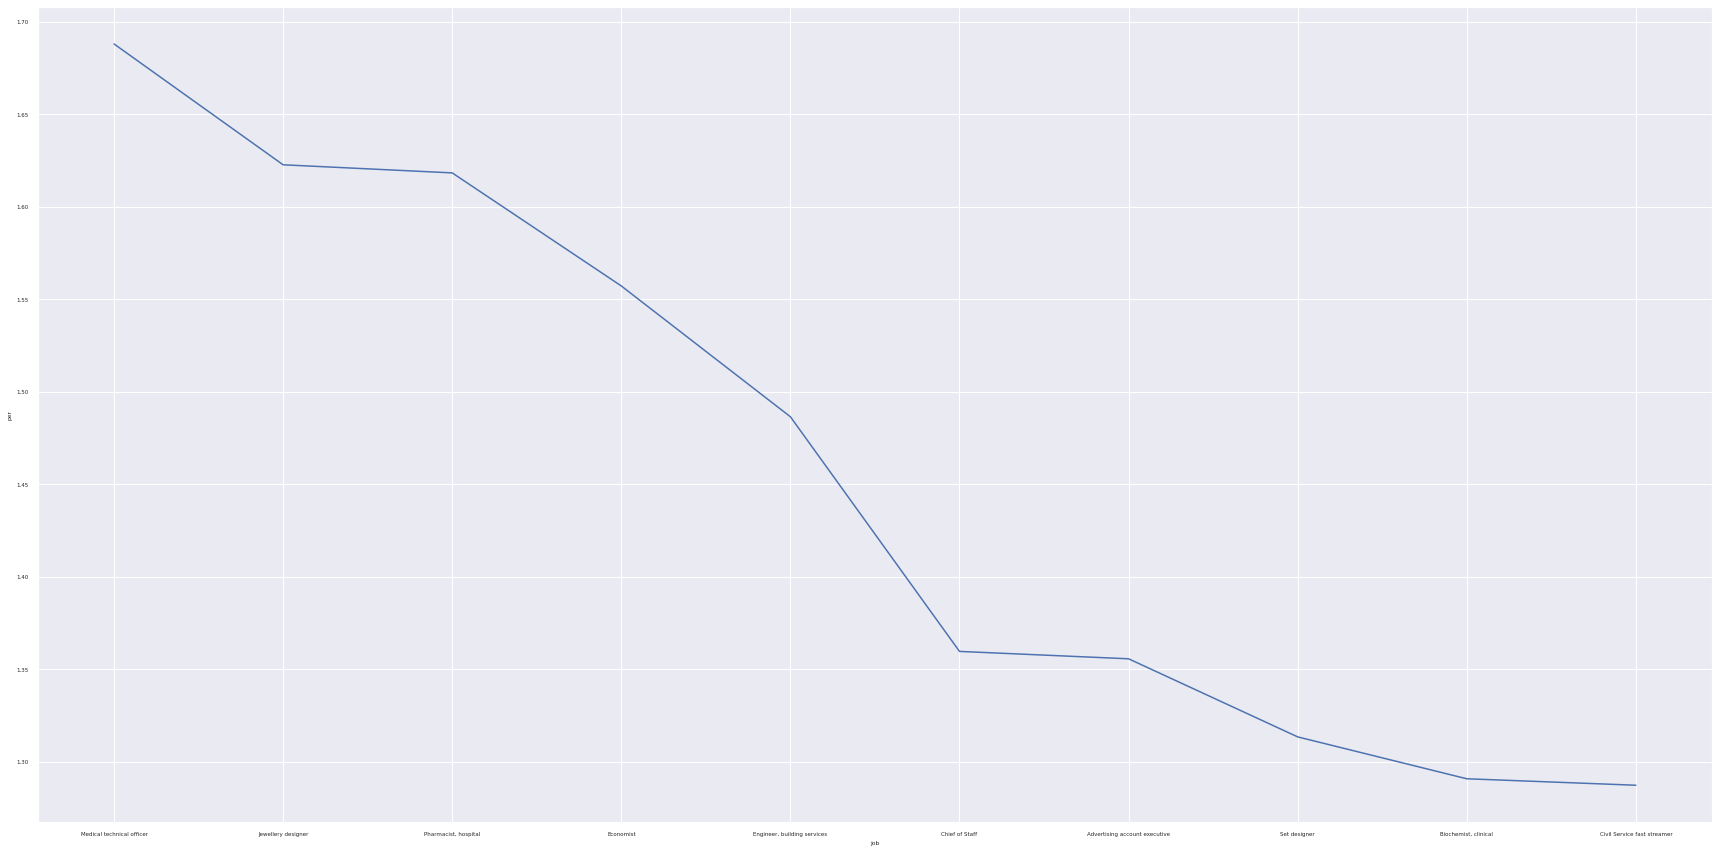

In [ ]:
feature_per('job',30,15,1.5)

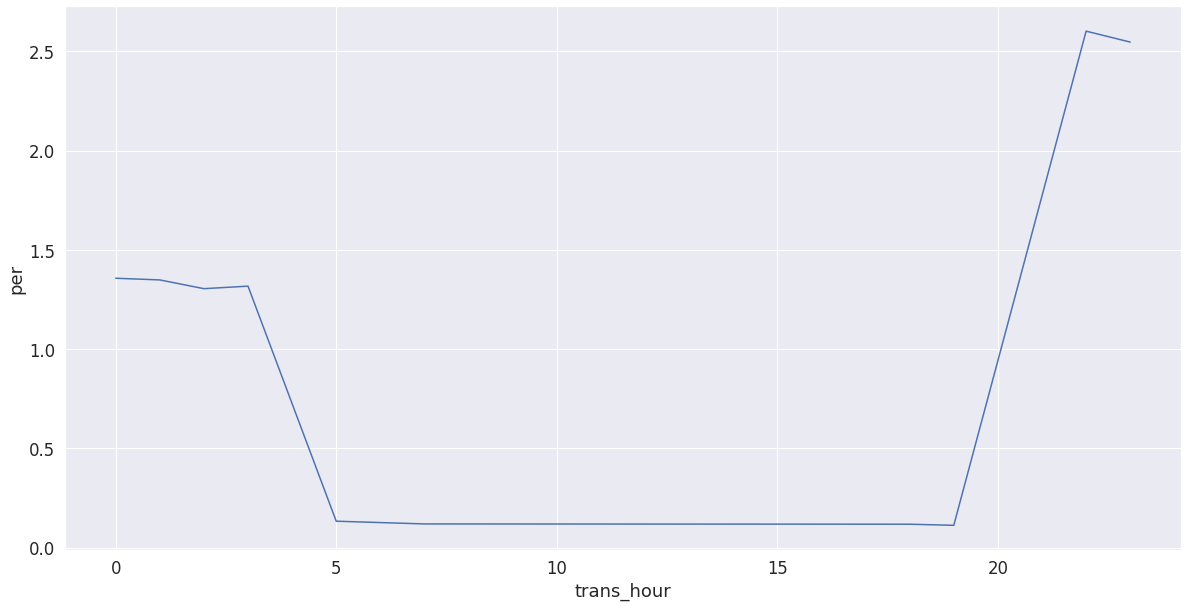

In [ ]:
feature_per('trans_hour',c=1.2)

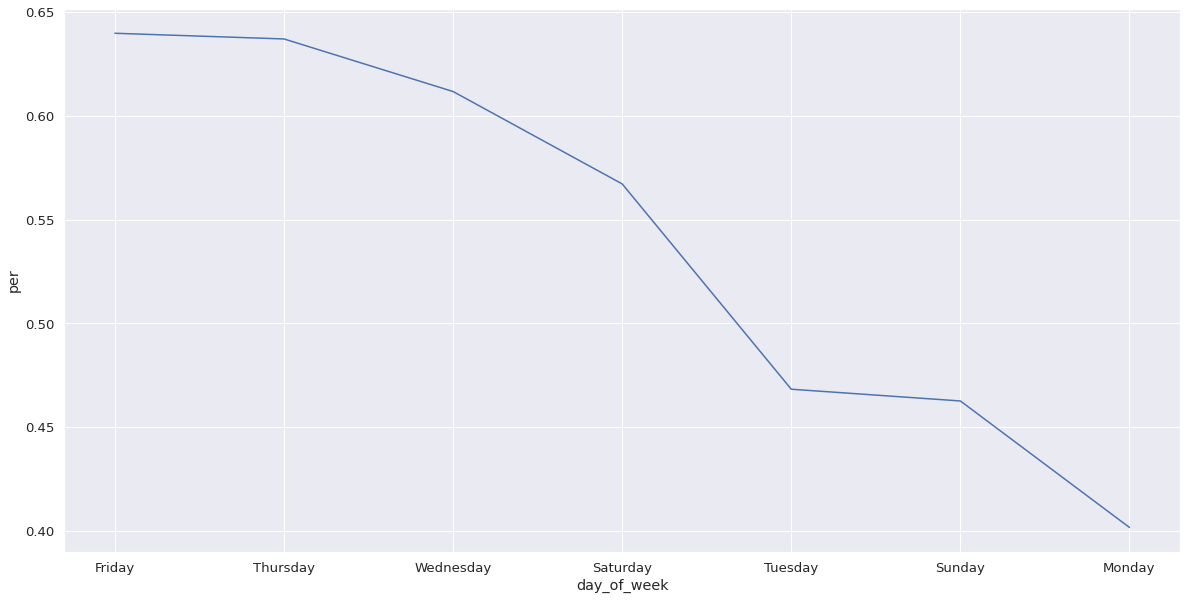

In [ ]:
feature_per('day_of_week')

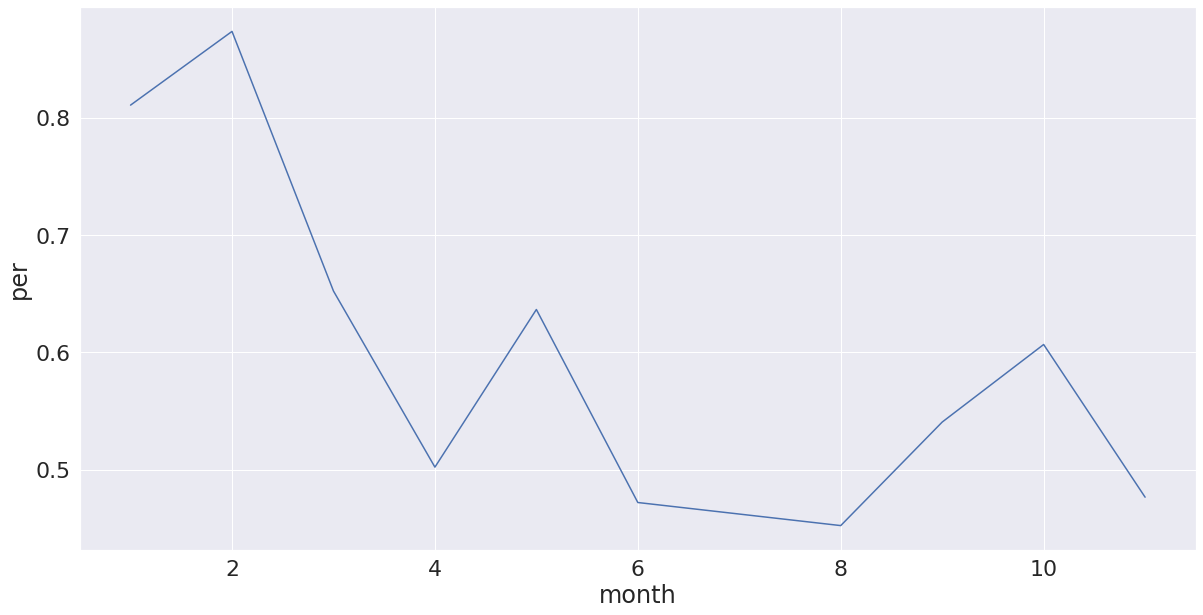

In [ ]:
feature_per('month',c=1.2)

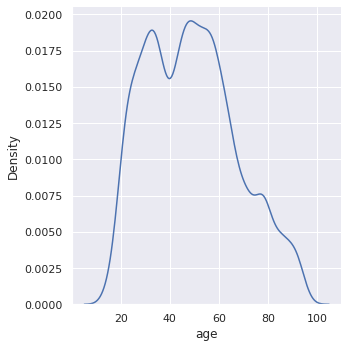

In [ ]:
sns.set(font_scale = 1)
sns.displot(data=df[df['is_fraud']==1],x='age',kind='kde')

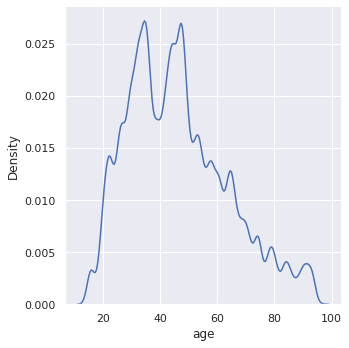

In [ ]:
sns.set(font_scale = 1)
sns.displot(data=df[df['is_fraud']==0],x='age',kind='kde')

In [ ]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='week',drop_first=True)

In [ ]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

In [ ]:
df1.index = pd.to_datetime(df1['trans_date_trans_time'])
df1 = df1.rename_axis(index={'trans_date_trans_time': 'time_index'})
df1 = df1.sort_index()
df1.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
time_index,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:18,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:44,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,0,0,0,0,0,0,0,0,1,0
2019-01-01 00:00:51,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:01:16,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,0,0,1,0,0,0,0,1,0
2019-01-01 00:03:06,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df1['val_for_agg'] = 1

60 days transactions by customer

In [ ]:
df_hist_trans_60d = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('60D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_60d.columns = ['cc_num','trans_date','hist_trans_60d']

In [ ]:
df_hist_trans_60d['trans_date'] = df_hist_trans_60d['trans_date'].dt.date

In [ ]:
df_hist_trans_60d = df_hist_trans_60d.groupby(['cc_num','trans_date'])['hist_trans_60d'].min().reset_index()

In [ ]:
df_hist_trans_60d.head(10)

,cc_num,trans_date,hist_trans_60d
0,60416207185,2019-01-01,0.0
1,60416207185,2019-01-02,1.0
2,60416207185,2019-01-03,5.0
3,60416207185,2019-01-04,7.0
4,60416207185,2019-01-05,9.0
5,60416207185,2019-01-06,11.0
6,60416207185,2019-01-07,12.0
7,60416207185,2019-01-08,13.0
8,60416207185,2019-01-09,16.0
9,60416207185,2019-01-10,18.0


24 hours order by customer

In [ ]:
df_hist_orders_24h = \
    df1 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_24h']

In [ ]:
df_hist_orders_24h.head(10)

,cc_num,trans_date_trans_time,hist_trans_24h
0,60416207185,2019-01-01 12:47:15,0.0
1,60416207185,2019-01-02 08:44:57,1.0
2,60416207185,2019-01-02 08:47:36,2.0
3,60416207185,2019-01-02 12:38:14,3.0
4,60416207185,2019-01-02 13:10:46,4.0
5,60416207185,2019-01-03 13:56:35,4.0
6,60416207185,2019-01-03 17:05:10,1.0
7,60416207185,2019-01-04 13:59:55,2.0
8,60416207185,2019-01-04 21:17:22,2.0
9,60416207185,2019-01-05 00:42:24,2.0


24 hrs fraud historic transactions

In [ ]:
df_hist_fraud_trans_24h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_24h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_24h']

In [ ]:
df_hist_fraud_trans_24h.head()

,cc_num,trans_date_trans_time,hist_fraud_trans_24h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,3.0
4,60416207185,2019-03-02 22:10:59,2.0


2 Hours Fraud by Customers

In [ ]:
df_hist_fraud_trans_2h = \
    df1[df1['is_fraud']== 1]\
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('2H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_fraud_trans_2h.columns = ['cc_num','trans_date_trans_time','hist_fraud_trans_2h']

In [ ]:
df_hist_fraud_trans_2h.head(10)

,cc_num,trans_date_trans_time,hist_fraud_trans_2h
0,60416207185,2019-03-01 01:32:53,0.0
1,60416207185,2019-03-01 02:42:25,1.0
2,60416207185,2019-03-01 23:06:58,2.0
3,60416207185,2019-03-02 22:10:38,1.0
4,60416207185,2019-03-02 22:10:59,1.0
5,60416207185,2019-03-02 23:01:54,2.0
6,60416207185,2019-03-02 23:08:08,3.0
7,60416207185,2019-03-02 23:11:08,4.0
8,60416207185,2019-03-02 23:43:40,5.0
9,60422928733,2019-04-17 00:08:16,6.0


60 Day Orders Amt Avg by Customers

In [ ]:
df_hist_trans_amt_avg_60d = \
    df1 \
    .groupby(['cc_num'])['amt']\
    .rolling('60D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_60d.columns = ['cc_num','trans_date','hist_trans_avg_amt_60d']

In [ ]:
df_hist_trans_amt_avg_60d['trans_date'] = df_hist_trans_amt_avg_60d['trans_date'].dt.date

In [ ]:
df_hist_trans_amt_avg_60d = df_hist_trans_amt_avg_60d.groupby(['cc_num','trans_date'])\
['hist_trans_avg_amt_60d'].min().reset_index()

In [ ]:
df_hist_trans_amt_avg_60d.head(10)

,cc_num,trans_date,hist_trans_avg_amt_60d
0,60416207185,2019-01-01,0.000000
1,60416207185,2019-01-02,7.270000
2,60416207185,2019-01-03,35.188333
3,60416207185,2019-01-04,31.365714
4,60416207185,2019-01-05,40.378889
5,60416207185,2019-01-06,43.053636
6,60416207185,2019-01-07,48.005000
7,60416207185,2019-01-08,60.016154
8,60416207185,2019-01-09,70.423125
9,60416207185,2019-01-10,69.753889


In [ ]:
df1['trans_date'] = df1['trans_date_trans_time'].dt.date

In [ ]:
df2 = df1.merge(df_hist_trans_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [ ]:
df2 = df2.merge(df_hist_orders_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_24h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_fraud_trans_2h,left_on = ['cc_num','trans_date_trans_time'], \
          right_on = ['cc_num','trans_date_trans_time'],how = 'left')

df2 = df2.merge(df_hist_trans_amt_avg_60d,left_on = ['cc_num','trans_date'], \
          right_on = ['cc_num','trans_date'],how = 'left')

In [ ]:
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']]= \
df2[['hist_trans_60d','hist_trans_24h','hist_fraud_trans_24h','hist_fraud_trans_2h','hist_trans_avg_amt_60d']].fillna(0)

In [ ]:
df2['hist_fraud_trans_24h'] = df2['hist_fraud_trans_24h'] - df2['hist_fraud_trans_2h']

In [ ]:
cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d','is_fraud']

In [ ]:
corr = df2[cols].corr()
corr_fraud=corr[['is_fraud']]
corr_fraud['abs']=corr_fraud.is_fraud.abs()

In [ ]:
corr_fraud.sort_values(by='abs',ascending=False)

,is_fraud,abs
is_fraud,1.000000,1.000000
hist_fraud_trans_24h,0.772578,0.772578
amt,0.209307,0.209307
hist_trans_avg_amt_60d,0.084064,0.084064
hist_trans_60d,-0.047788,0.047788
category_shopping_net,0.042452,0.042452
category_grocery_pos,0.033483,0.033483
category_misc_net,0.024667,0.024667
category_home,-0.016623,0.016623
category_kids_pets,-0.014307,0.014307


In [ ]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','week_Monday','week_Tuesday', 'week_Wednesday','week_Thursday',
        'week_Saturday', 'week_Sunday','dist','hist_trans_60d','hist_trans_24h',
       'hist_fraud_trans_24h','hist_trans_avg_amt_60d'] #,

Y_cols = ['is_fraud']

In [ ]:
#Importing Library
from sklearn.model_selection import train_test_split
df2.is_fraud.value_counts()

0    1842831
1       9651
Name: is_fraud, dtype: int64

In [ ]:
X,y=df2[X_cols],df2[Y_cols]

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
#First oversample data then undersample the majority class
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=0.1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
y_train.is_fraud.value_counts()

0    257990
1     25799
Name: is_fraud, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2", "elasticnet"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9922477739574058


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
logreg2=LogisticRegression(C=1000,penalty="l2")
logreg2.fit(X_train,y_train)


pred_test = logreg2.predict(X_test)


print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.84      0.80      0.82      2908

    accuracy                           1.00    555745
   macro avg       0.92      0.90      0.91    555745
weighted avg       1.00      1.00      1.00    555745



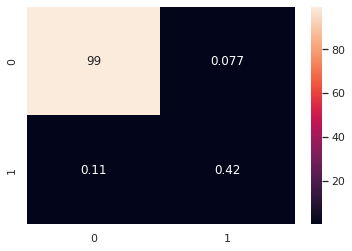

In [ ]:
cm=confusion_matrix(y_test,pred_test)
sns.heatmap(cm/len(y_test)*100,annot=True)

In [ ]:
weights=logreg2.coef_[0]

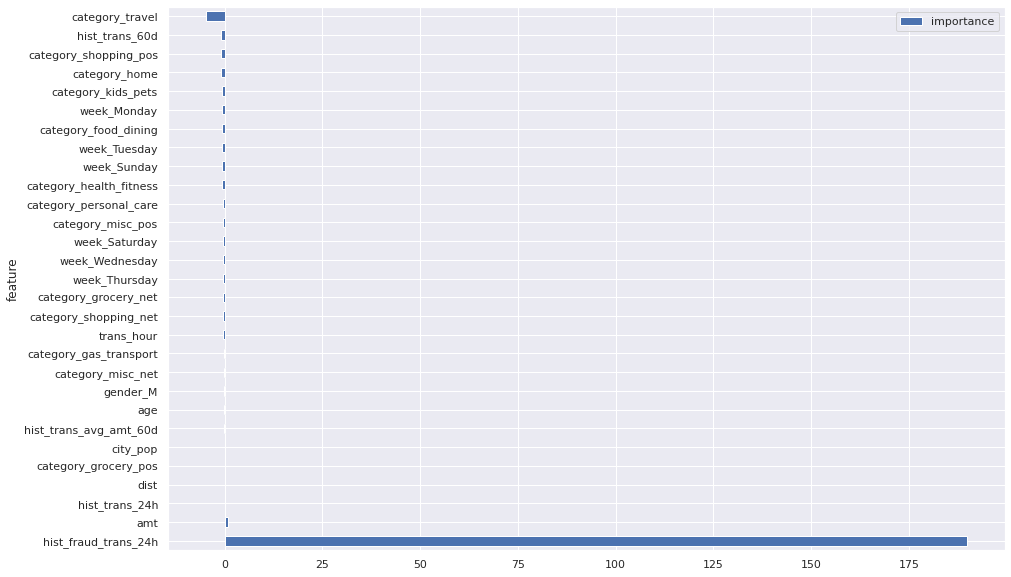

In [ ]:
import math
feature_names=X_cols
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = weights
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='feature', y='importance', figsize=(15, 10))



Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

grid = { 
    'n_estimators': [5,10],
    'max_depth' : [5,10],
    'criterion' :[ 'gini']
}


rfc=RandomForestClassifier(random_state=42)
rfc_cv=GridSearchCV(rfc,grid,cv=5)
rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 10}
accuracy : 0.9954120937917159


In [ ]:
rfc2=RandomForestClassifier(n_estimators=10,max_depth=10,criterion='gini')
rfc2.fit(X_train,y_train)

pred_test = rfc2.predict(X_test)


print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552837
           1       0.97      0.92      0.94      2908

    accuracy                           1.00    555745
   macro avg       0.99      0.96      0.97    555745
weighted avg       1.00      1.00      1.00    555745



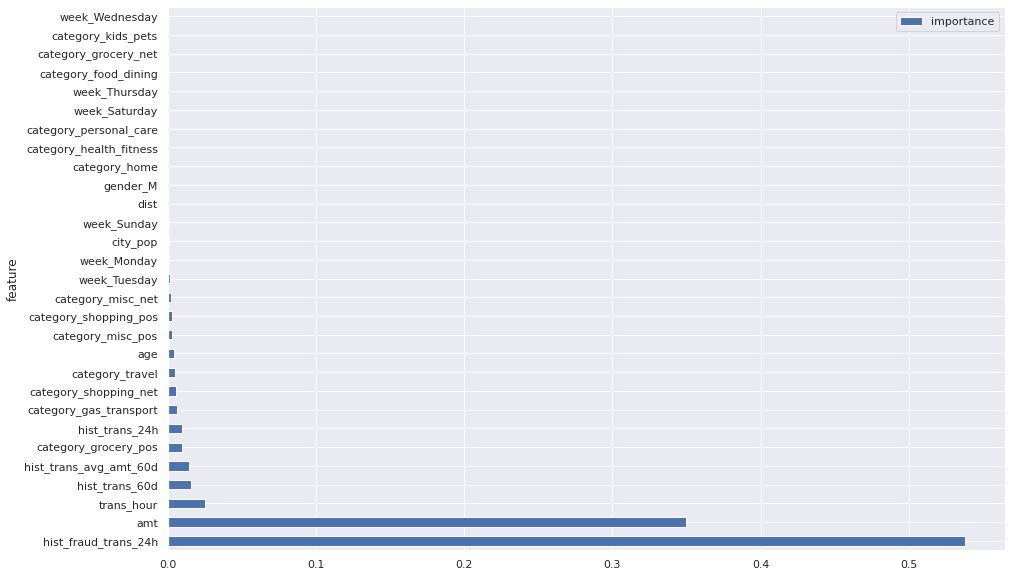

In [ ]:
import numpy as np
importances = rfc2.feature_importances_

feature_names=X_cols
forest_importances = pd.DataFrame(feature_names, columns = ["feature"])
forest_importances["importance"] = importances

feature_importance = forest_importances.sort_values(by = ["importance"], ascending=False)

ax = feature_importance.plot.barh(x='feature', y='importance', figsize=(15, 10))

Neural Networks

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras.layers import InputLayer

In [ ]:
def model_neural(layers=[10,10],dropout=True,dropout_value=0.5):
  model = Sequential()
  feature_count=len(X_cols)
  model.add(InputLayer(input_shape=(feature_count,)))
  for layer in layers:
    model.add(Dense(units=layer, activation='relu'))
    if dropout:
      model.add(Dropout(dropout_value))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])    
  history = model.fit(X_train,y_train, epochs=5,verbose=1,validation_data=(X_test, y_test))
  return model,history

In [ ]:
def history_print(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'Valid'], loc='upper left')
  plt.show()

In [ ]:
model1,history1=model_neural()

Epoch 1/5
8869/8869 [==============================] - 39s 4ms/step - loss: 0.1208 - accuracy: 0.9633 - val_loss: 0.0114 - val_accuracy: 0.9979
Epoch 2/5
8869/8869 [==============================] - 36s 4ms/step - loss: 0.0560 - accuracy: 0.9839 - val_loss: 0.0083 - val_accuracy: 0.9985
Epoch 3/5
8869/8869 [==============================] - 36s 4ms/step - loss: 0.0542 - accuracy: 0.9842 - val_loss: 0.0081 - val_accuracy: 0.9989
Epoch 4/5
8869/8869 [==============================] - 36s 4ms/step - loss: 0.0523 - accuracy: 0.9846 - val_loss: 0.0076 - val_accuracy: 0.9989
Epoch 5/5
8869/8869 [==============================] - 38s 4ms/step - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.0076 - val_accuracy: 0.9990


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                300       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


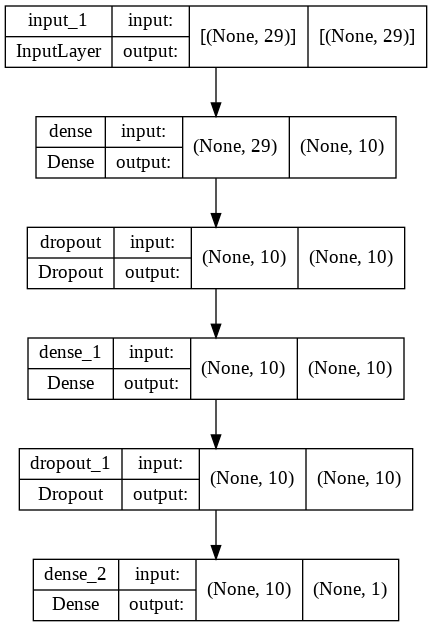

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, show_shapes=True, show_layer_names=True)

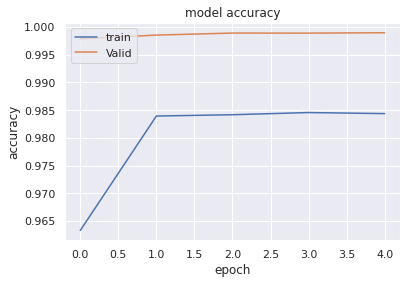

In [ ]:
history_print(history1)